### Understanding PCA by Iteratively applying the Feynman Technique :-)
- It is just a method of summarizing some data. We can describe each object/class of interest by many features: colour, age and so on
- We can compose a whole list of different characteristics but many of them will measure related properties and so will be redundant. Hence, we should be able to summarize each class with fewer characteristics
1. Does this mean PCA checks what characteristics/features are redundant and discards them?
    - No. PCA does not select some characteristics and discard the others. Instead, it constructs some new characteristics that summarize our data well. Of course, these new characteristics are constructed using the old ones; for example, a new characteristic might be computed as a * F1 + b * F2 + ... (we call them linear combinations). In fact, PCA finds the best possible characteristics, as much as "linearly possible"
2. What do we mean by "summarizing data"?
    - First answer is that you are looking for some properties (characteristics/features) that strongly differ across instances. higher variance => higher information content*
    - And you look for the properties that would allow you to predict, or "reconstruct", the original characteristics. Again, imagine that you come up with a property that has no relation to the original characteristics; if you use only this new property, there is no way you could reconstruct the original ones! This, again, would be a bad summary. So PCA looks for properties that allow reconstructing the original characteristics as well as possible
3. These two "goals" of PCA sound so different! How are they be equivalent?
    - Consider the image: 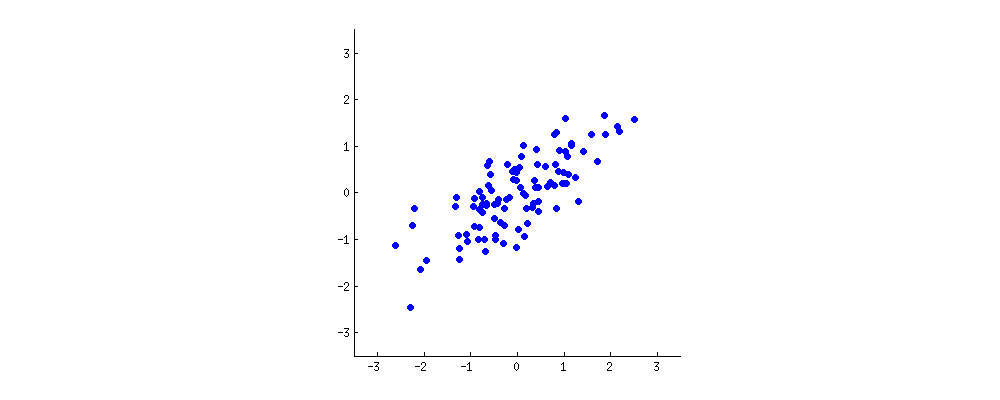
    - Each dot in this "cloud" shows one particular data point (say, customer). You see that the two properties (x1 and x2 on this figure) are correlated. A new property can be constructed by drawing a line through the centre of this cloud and projecting all points onto this line. This new property will be given by a linear combination w1*x1 + w2*x2, where each line corresponds to some particular values of 𝑤1 and 𝑤2.
    <div>
    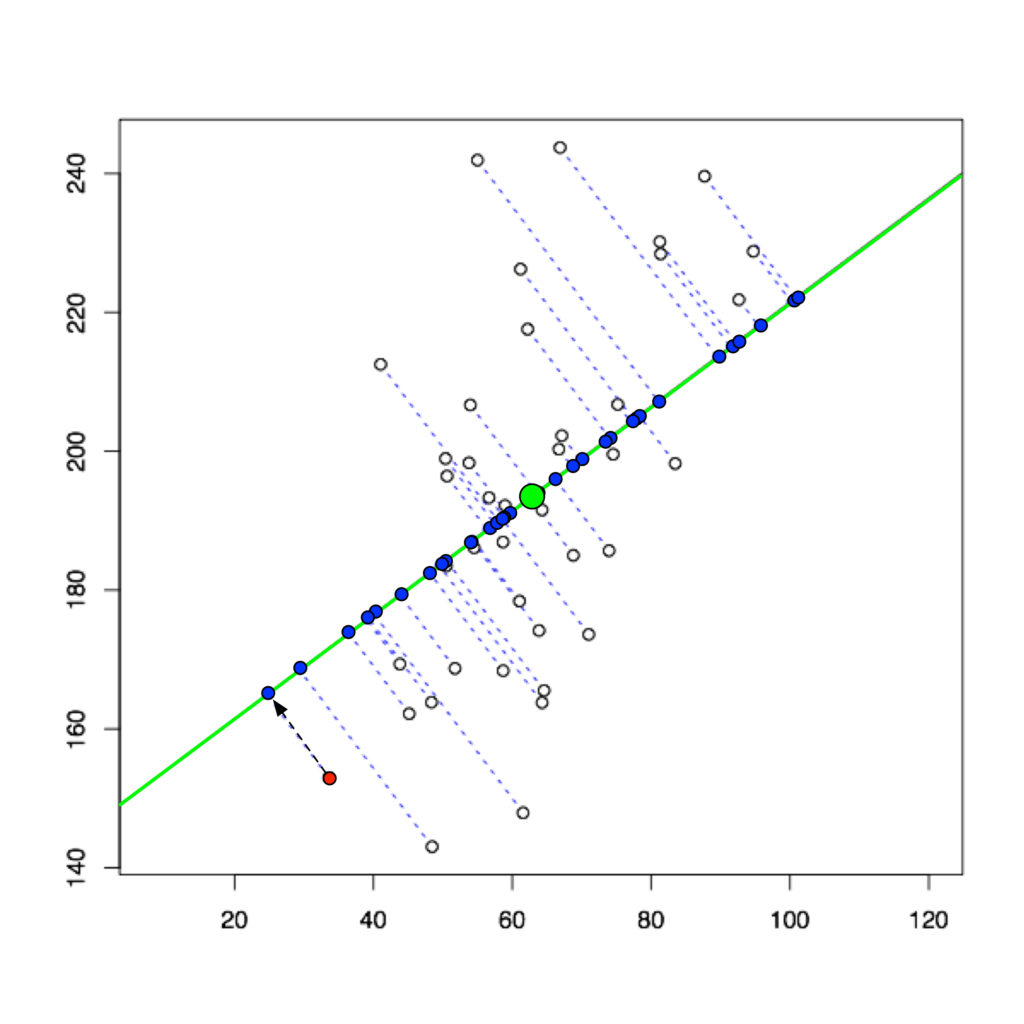
    </div>
    - PCA will find the "best" line according to two different criteria of what is the "best". 
        - First, the variation of values along this line should be maximal
        - Second, if we reconstruct the original two characteristics, the reconstruction error will be given by the length of the connecting line. Observe how the length of these red lines changes if the line rotates; can you see when the total length reaches minimum?
        - If you stare at this for some time, you will notice that "the maximum variance" and "the minimum error" are reached at the same time
        - this new property is called "first principal component". And instead of saying "property" or "characteristic", we usually say "feature" or "variable".
4. The two goals (maximize variance, minimize error) yield the same result: is it essentially because of the Pythagoras theorem?
    - The spread of the blue dots is measured as the average squared distance from the centre of the data cloud to each blue dot; it is called the variance. On the other hand, the total reconstruction error is measured as the average squared length of the corresponding dashed lines from the data points (circles) to the green line. But as the angle between dashed lines and the green line is always 90∘, the sum of these two quantities is equal to the average squared distance between the centre of the cloud and each data point (circle); this is precisely Pythagoras theorem. Of course, this average distance does not depend on the orientation of the green line, so the higher the variance, the lower the error (because their sum is constant).    
5. How is PCA related to eigenvectors and eigenvalues?
    - To reduce dimensionality of a data set we should evaluate the contribution of each variable to the overall variance(=information) of the dataset in order to choose those with the greatest contribution and discard those with lowest contribution. We use the covariance matrix to help with this
    - Let us consider a two variable scenario <div>
    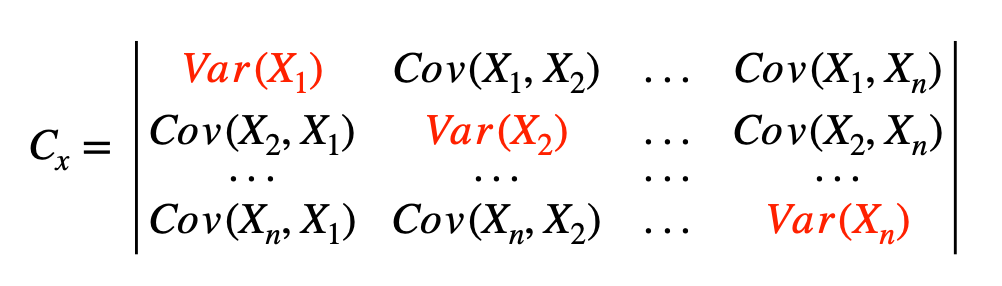
    </div>
    - When we calculate the Variance/Covariance Matrix of our original dataset (we call the original dataset X as a collection of many column vectors X1, X2…Xn) we see the variances along the diagonal but we also see the joint covariances in the off diagonal elements
    - Because we cannot modify our original data X in order to eliminate the correlations between variables (unless we remove completely a variable which is always possible but risky because we could unwillingly remove important information), we can try to find a way to ‘transform’ X into a different data set Y having special (special=eigen in german language…) link with X but built in a way that the new variables of Y(Y1,Y2…Yn) would have a different Covariance matrix Cy where variances of these variables would be “isolated” from the interefences (correlations) of the other variables (=> covariances = 0)
    <div>
    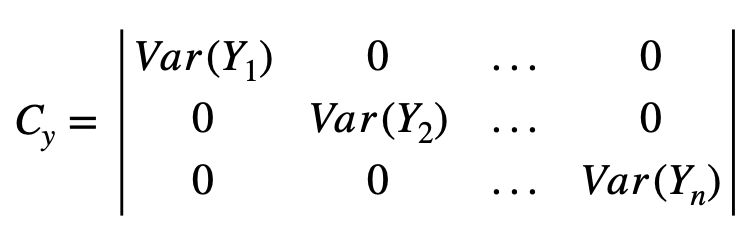
    </div>
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('../Datasets/wine.xlsx')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
df.columns = df.columns.str.strip() # removing unnecessary spaces from the column names

Let's look at the basic statistics of the features

In [4]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Let's find the distribution of each feature for the given wine classes. We are using boxplot here

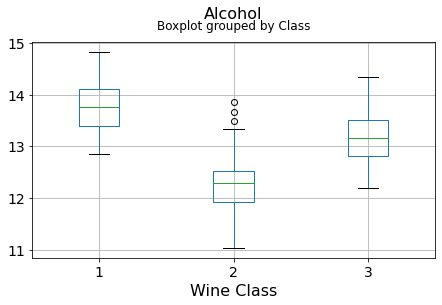

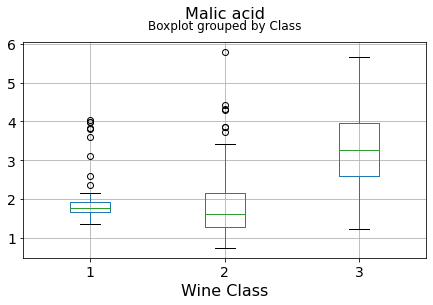

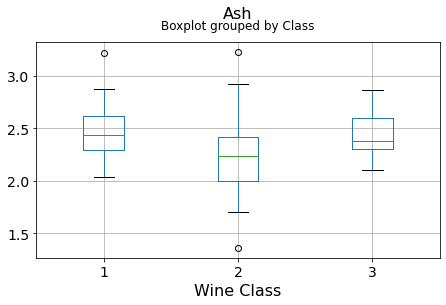

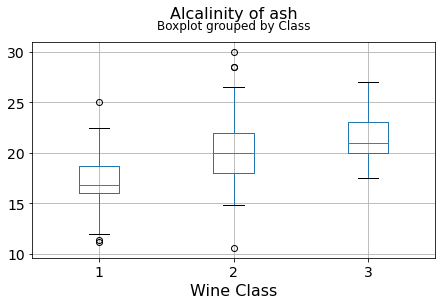

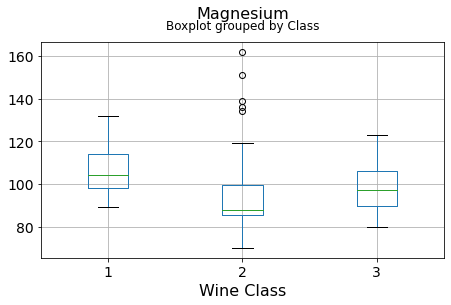

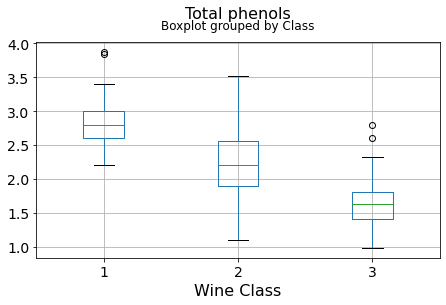

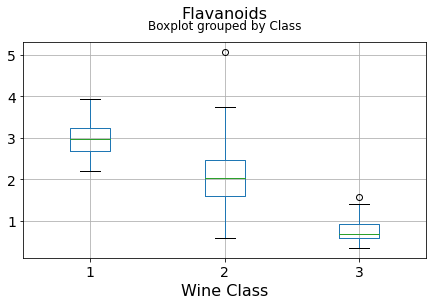

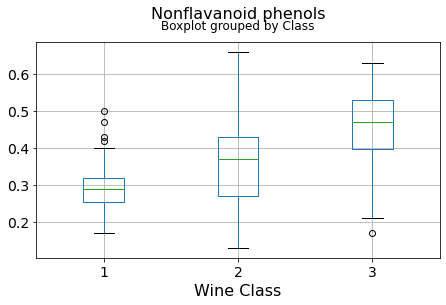

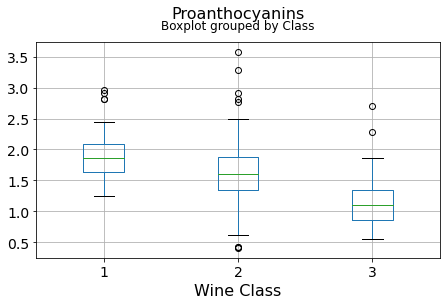

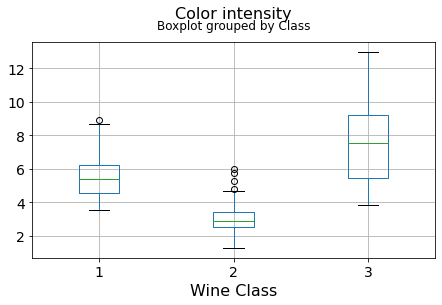

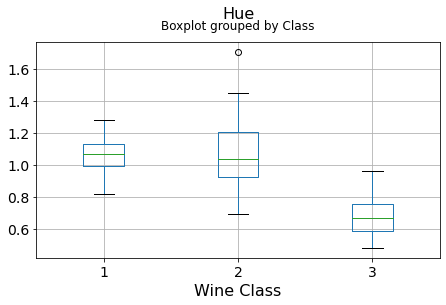

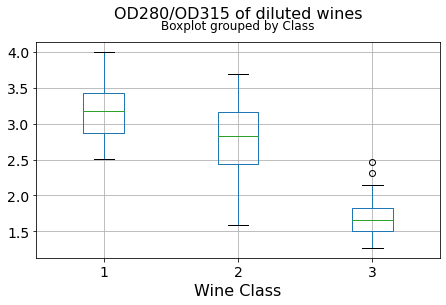

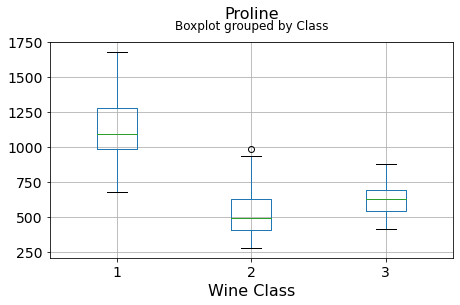

In [5]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

- It can be seen that some features classify the wine labels quite clearly. 
- For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class seperation using two variables

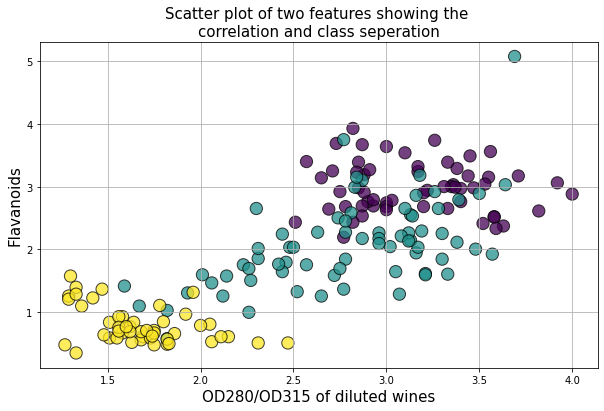

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

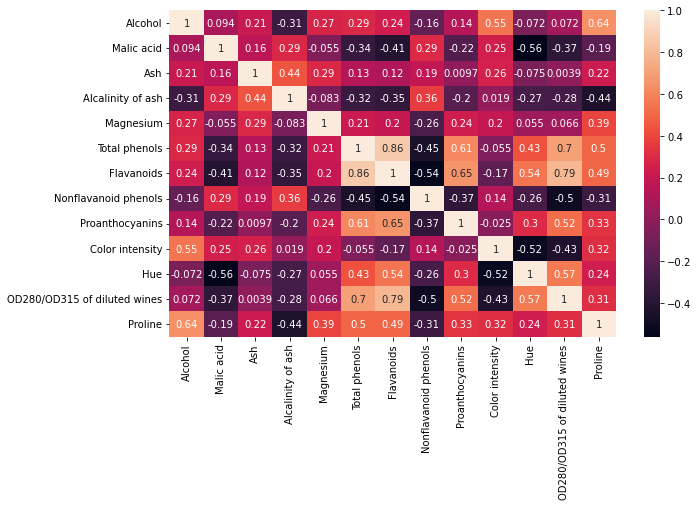

In [7]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,1:].corr(), annot=True)
plt.show()

## Principal Component Analysis
### Data scaling
PCA requires scaling/normalization of the data to work properly

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X = df.drop('Class',axis=1) # Features
y = df['Class'] # Target

In [10]:
X = scaler.fit_transform(X) # scaling the features

In [11]:
df_x = pd.DataFrame(data=X,columns=df.columns[1:]) # X is an array, we are turning it into a pandas df again

In [12]:
df_x.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


In [13]:
df_x.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [14]:
from sklearn.decomposition import PCA
pca = PCA()

In [15]:
df_x_pca = pca.fit(df_x)

Plot the explained variance ratio

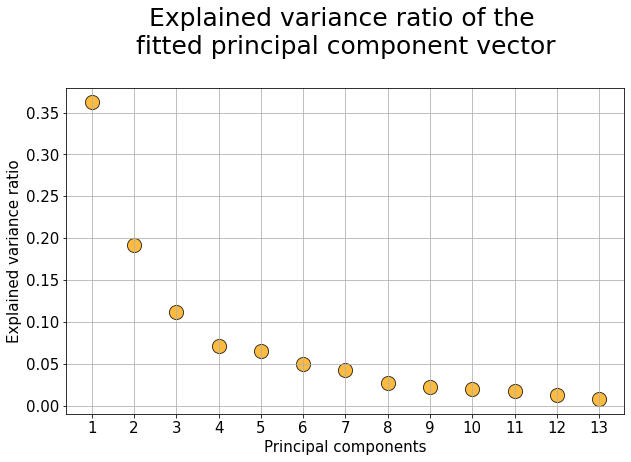

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(df_x_pca.explained_variance_ratio_))],
            y=df_x_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_x_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the `1st` principal component explains about 36% of the total variance in the data and the 
`2nd` component explians further 20%. Therefore, if we just consider the first two components, they together explain 56% of the total variance.

In [17]:
df_x_trans = pca.transform(df_x)

In [18]:
df_x_trans = pd.DataFrame(data=df_x_trans)
df_x_trans.shape

(178, 13)

In [19]:
df_x_trans.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


Plot the first two columns of this transformed data set with the color set to original ground truth class label

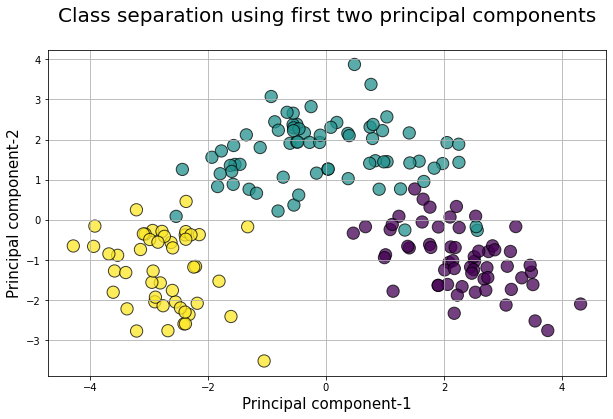

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(df_x_trans[0],df_x_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

In [21]:
df_x_pca.components_.shape

(13, 13)

In [22]:
df_x_pca.components_[0]*df_x.iloc[0,:]

Alcohol                         0.219180
Malic acid                      0.137857
Ash                            -0.000476
Alcalinity of ash               0.279908
Magnesium                       0.271759
Total phenols                   0.319280
Flavanoids                      0.437660
Nonflavanoid phenols            0.196901
Proanthocyanins                 0.383915
Color intensity                -0.022306
Hue                             0.107463
OD280/OD315 of diluted wines    0.695127
Proline                         0.290483
Name: 0, dtype: float64

In [23]:
df_x_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


### PCA from scratch
- Scale the data
- Calculate covariance matrix — square matrix giving the covariances between each pair of elements of a random vector
- Eigendecomposition

In [24]:
X = df.drop('Class',axis=1) # Features
y = df['Class'] # Target

In [25]:
# Scaling the features
X = scaler.fit_transform(X)

In [26]:
#Covariance
features = X.T
cov_matrix = np.cov(features)
cov_matrix.shape

(13, 13)

In [28]:
# eigenvalues and eigen vectors
values, vectors = np.linalg.eig(cov_matrix)
vectors.shape

(13, 13)

In [29]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

In [30]:
#sort the eigenvalues in descending order
sorted_index = np.argsort(values)[::-1]

values = values[sorted_index]
#similarly sort the eigenvectors 
vectors = vectors[:,sorted_index]

# Sort explained variances
explained_variances = [explained_variances[i] for i in sorted_index]

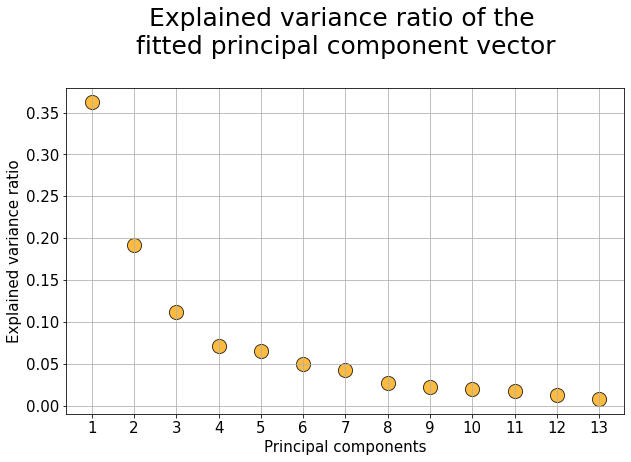

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(explained_variances))],
            y=explained_variances,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(df_x_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [32]:
vectors[0]

array([-0.1443294 , -0.48365155,  0.20738262, -0.0178563 ,  0.26566365,
       -0.21353865, -0.05639636, -0.39613926,  0.50861912,  0.21160473,
       -0.22591696,  0.26628645,  0.01496997])

In [33]:
df_x_pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

In [34]:
values

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

In [35]:
df_x_pca.n_components_

13

In [36]:
pd.DataFrame(np.dot(X,vectors))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.316751,-1.443463,0.165739,-0.215631,-0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,-0.540810,-0.066239
1,-2.209465,0.333393,2.026457,-0.291358,0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,-0.388238,0.003637
2,-2.516740,-1.031151,-0.982819,0.724902,0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,-0.000584,0.021717
3,-3.757066,-2.756372,0.176192,0.567983,0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,0.242020,-0.369484
4,-1.008908,-0.869831,-2.026688,-0.409766,-0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.370524,-2.216289,0.342570,1.058527,0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,-0.170786,-0.114427
174,2.601956,-1.757229,-0.207581,0.349496,-0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,0.279431,-0.187371
175,2.677839,-2.760899,0.940942,0.312035,-1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,-0.698766,0.072078
176,2.387017,-2.297347,0.550696,-0.688285,-0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,-0.339821,-0.021866


In [37]:
df_x_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [42]:
pd.DataFrame(np.dot(df_x_pca.components_,X.T))

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,3.316751,2.209465,2.516740,3.757066,1.008908,3.050254,2.449090,2.059437,2.510874,2.753628,...,-2.181413,-2.380928,-3.211617,-3.677919,-2.465556,-3.370524,-2.601956,-2.677839,-2.387017,-3.208758
1,-1.443463,0.333393,-1.031151,-2.756372,-0.869831,-2.122401,-1.174850,-1.608963,-0.918071,-0.789438,...,-2.077537,-2.588667,0.251249,-0.847748,-2.193798,-2.216289,-1.757229,-2.760899,-2.297347,-2.768920
2,-0.165739,-2.026457,0.982819,-0.176192,2.026688,-0.629396,-0.977095,0.146282,-1.770969,-0.984247,...,0.763783,1.418044,-0.847129,-1.339420,-0.918781,-0.342570,0.207581,-0.940942,-0.550696,1.013914
3,-0.215631,-0.291358,0.724902,0.567983,-0.409766,-0.515637,-0.065831,-1.192608,0.056270,0.349382,...,-0.389593,0.588502,-0.217065,-0.125176,0.018025,1.058527,0.349496,0.312035,-0.688285,0.596903
4,0.693043,-0.257655,-0.251033,-0.311842,0.298458,-0.632019,-1.027762,0.076903,-0.892257,-0.468553,...,0.359874,1.127997,0.609095,-0.486112,-0.701210,-0.574164,0.255063,1.271355,0.813955,-0.895193
5,-0.223880,-0.927120,0.549276,0.114431,-0.406520,0.123431,-0.620121,-1.439806,-0.129181,0.163392,...,0.629568,-0.983645,-0.395378,0.857959,0.680855,-1.108788,-0.026465,0.273068,1.178783,0.296092
6,0.596427,0.053776,0.424205,-0.383337,0.444074,0.401654,0.052891,0.032376,0.125285,-0.874352,...,-0.753322,-0.930473,-0.291849,-1.025640,-0.829199,0.958416,0.146894,0.679235,0.633975,0.005741
7,0.065139,1.024416,-0.344216,0.643593,0.416700,0.394893,-0.371934,0.232979,-0.499578,0.150580,...,-0.926074,-0.294005,0.582906,0.676087,-0.296516,-0.146097,-0.552427,0.047024,0.390829,-0.292914
8,0.641443,-0.308847,-1.177834,0.052544,0.326819,-0.152146,-0.457016,0.123370,0.606589,0.230489,...,-0.109834,-0.002526,-0.597123,0.020623,0.326836,-0.022498,-0.097969,0.001222,0.057448,0.741660
9,1.020956,0.159701,0.113361,0.239413,-0.078366,-0.101996,1.016563,0.735600,0.174107,0.179420,...,0.216634,-0.708790,0.154925,-0.027337,0.274159,-0.304117,-0.206061,-0.247997,0.491490,-0.117969
